<div class="alert alert-danger">

<h1>Take notice!🎥</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Open Street Map

In this lab, you will learn how to:
* use various python libraries to search for and download Open Street Map *building* data
* categorize buildings by type
* visualize buildings on a map
* create a function to produce building maps
* create a loop to produce building maps for multiple locations

Note that we will learn how to use street network analysis with OSMnx in subsequent labs.

![osm](images/OSM.png)
What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples


## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file

[OSMNx source](https://github.com/gboeing/osmnx/blob/99f4b1566a22f2a4dd3763190f8d0f3efa2a9b7f/osmnx/geometries.py)

<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Define an area of interest

<div class="alert alert-info">

Search for a different city in the world other than Downtown Los Angeles. It can be where you're from, where you're living, or a place you want to travel to.
</div>

In [7]:
address = 'West Loop, Near West Side, Chicago, IL'

In [8]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.features.features_from_address(address,tags={'building':True},dist=1000)

CPU times: user 330 ms, sys: 8.21 ms, total: 338 ms
Wall time: 1.74 s


<div class="alert alert-danger">
    
<h2>Be careful!</h2>

Buildings are the "heaviest" data types to download, as they often encompass thousands of polygons. While you are technically capable of downloading buildings for entire neighborhoods and cities, doing so can easily overwhelm your notebook. Start small, and scale up!
</div>

In [6]:
# how many rows and columns?
osm.shape

(1861, 138)

In [9]:
# what is the datatype?
type(osm)


geopandas.geodataframe.GeoDataFrame

In [10]:
# show me 10 random rows
osm.sample(10)

addr:state       building  ele gnis:county_name  \
element_type osmid                                                        
way          210270722         NaN     commercial  NaN              NaN   
             210269854         NaN            yes  NaN              NaN   
             546131159          IL            yes  NaN              NaN   
             1020405388         IL  train_station  NaN              NaN   
             209809983         NaN            yes  NaN              NaN   
             384773661         NaN            yes  NaN              NaN   
             209830197         NaN            yes  NaN              NaN   
             210270006         NaN            yes  NaN              NaN   
             210270676         NaN            yes  NaN              NaN   
             210270816         NaN            yes  NaN              NaN   

                        gnis:feature_id gnis:import_uuid gnis:reviewed  \
element_type osmid                                                       
way          210270722              NaN              NaN           NaN   
             210269854              NaN              NaN           NaN   
             546131159              NaN              NaN           NaN   
             1020405388             NaN              NaN           NaN   
             209809983              NaN              NaN           NaN   
             384773661              NaN              NaN           NaN   
             209830197              NaN              NaN           NaN   
             210270006              NaN              NaN           NaN   
             210270676              NaN              NaN           NaN   
             210270816              NaN              NaN           NaN   

                                                  name source  \
element_type osmid                                              
way          210270722            Zurich Insurance Co.    NaN   
             210269854                             NaN    NaN   
             546131159                             NaN    NaN   
             1020405388  Ogilvie Transportation Center    NaN   
             209809983                             NaN    NaN   
             384773661                             NaN    NaN   
             209830197                             NaN    NaN   
             210270006                             NaN    NaN   
             210270676                             NaN    NaN   
             210270816                             NaN    NaN   

                                                                  geometry  \
element_type osmid                                                           
way          210270722   POLYGON ((-87.64142 41.88375, -87.64140 41.883...   
             210269854   POLYGON ((-87.65896 41.87845, -87.65903 41.878...   
             546131159   POLYGON ((-87.64677 41.89080, -87.64667 41.890...   
             1020405388  POLYGON ((-87.64115 41.88512, -87.64112 41.885...   
             209809983   POLYGON ((-87.66346 41.87296, -87.66346 41.873...   
             384773661   POLYGON ((-87.65753 41.87690, -87.65761 41.876...   
             209830197   POLYGON ((-87.66385 41.89049, -87.66392 41.890...   
             210270006   POLYGON ((-87.66101 41.88439, -87.66101 41.884...   
             210270676   POLYGON ((-87.65147 41.88523, -87.65155 41.885...   
             210270816   POLYGON ((-87.65778 41.89037, -87.65780 41.890...   

                         ... owner rooms bridge building:min_levels  \
element_type osmid       ...                                          
way          210270722   ...   NaN   NaN    NaN                 NaN   
             210269854   ...   NaN   NaN    NaN                 NaN   
             546131159   ...   NaN   NaN    NaN                 NaN   
             1020405388  ...   NaN   NaN    NaN                 NaN   
             209809983   ...   NaN   NaN    NaN                 NaN   
             384773

## Eliminate unnecessary columns
The dataframe has 100+ columns. Let's explore what these are, and which ones are necessary for our use.

What are the datatypes and count of null values?

In [11]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1861 entries, ('node', 368071238) to ('relation', 13827306)
Data columns (total 138 columns):
 #    Column                                    Non-Null Count  Dtype   
---   ------                                    --------------  -----   
 0    addr:state                                280 non-null    object  
 1    building                                  1861 non-null   object  
 2    ele                                       5 non-null      object  
 3    gnis:county_name                          3 non-null      object  
 4    gnis:feature_id                           4 non-null      object  
 5    gnis:import_uuid                          3 non-null      object  
 6    gnis:reviewed                             3 non-null      object  
 7    name                                      235 non-null    object  
 8    source                                    6 non-null      object  
 9    geometry                               

Really, what we need is just...

In [12]:
## subset it
columns_to_keep = ['geometry','building','height']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                           
node         368071238                          POINT (-87.64172 41.88614)   
             4382963441                         POINT (-87.66319 41.88266)   
way          23807294    POLYGON ((-87.63995 41.88379, -87.63994 41.883...   
             37126546    POLYGON ((-87.64355 41.87520, -87.64354 41.874...   
             37616142    POLYGON ((-87.66217 41.88197, -87.66216 41.881...   
             40784949    POLYGON ((-87.66210 41.88396, -87.66210 41.883...   
             40785416    POLYGON ((-87.66265 41.88164, -87.66265 41.881...   
             40785423    POLYGON ((-87.64959 41.88220, -87.64867 41.882...   
             40785425    POLYGON ((-87.64951 41.88162, -87.64951 41.881...   
             40785438    POLYGON ((-87.64964 41.88398, -87.64962 41.883...   

                               building height  
element_type osmid                              
node         368071238              yes    NaN  
             4382963441             yes    NaN  
way          23807294     train_station    NaN  
             37126546    transportation    NaN  
             37616142               yes    NaN  
             40784949           parking    NaN  
             40785416        commercial    NaN  
             40785423               yes    NaN  
             40785425        apartments    NaN  
             40785438               yes    NaN

### Cleaning up unspecified building types

Wait, what is the "yes" building type? According to OSM's wiki page, this is a building of "[unspecific type](https://wiki.openstreetmap.org/wiki/Tag:building%3Dyes)", used when someone is unable or unwilling to tag it more specifically.

With this in mind, let's change "yes" to "unspecified". To do so, we will use the `.loc` function as documented [here](https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/)

In [13]:
# locate cells in column building where value is yes
osm.loc[osm['building']=='yes','building'] = 'unspecified'

# Make a building type chart

Let's create a dataframe for building types. We can do this with a nifty series of chained code functions in a single line.

In [14]:
# get the counts of buildings by building type
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

,building,count
0,unspecified,1452
1,terrace,103
2,apartments,80
3,office,50
4,commercial,31
5,residential,29
6,retail,19
7,construction,16
8,university,15
9,school,10


## Create a bar chart

To start, the simplest method to create a bar plot in python is to simply add `plot.bar` to the dataframe.

In [17]:
osm_building_cut = osm_building_counts.drop(osm_building_counts[osm_building_counts['building']=='unspecified'].index)

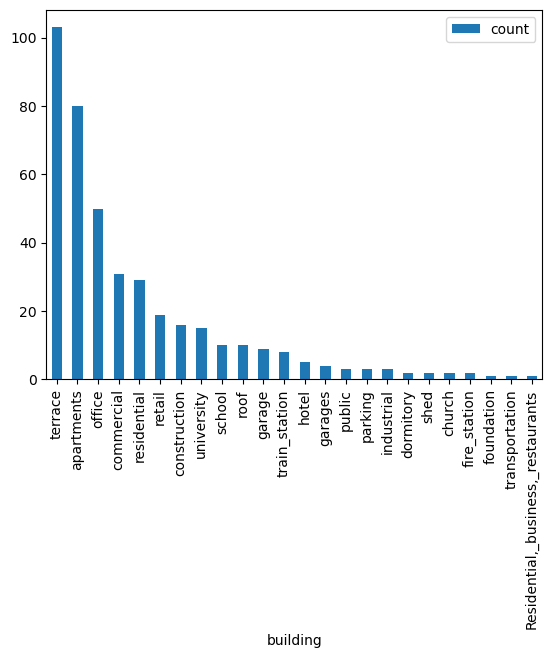

In [18]:
# create bar chart with osm buildings where x axis is building count
osm_building_cut.plot.bar(x='building');

Now output it again, but this time, only show the "Top 10."

Take the extra mile to make it pretty!

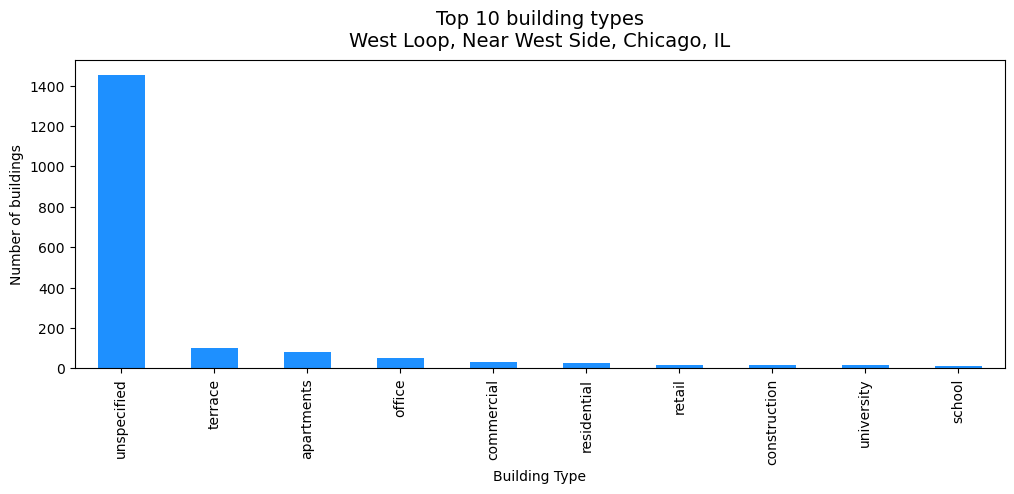

In [16]:
# create matplotlib bar chart with detailed title and x and y axis labels

# create empty figure and axex where dataframe will be plotted
fig, ax = plt.subplots(figsize=(12,4))

# plot top ten building types with counts 
osm_building_counts[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )

ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

### Going the extra "extra" mile

The chart that was just created uses Matplotlib, which has long been a standard in Python libraries. 

Here we introduce [plotly](https://plotly.com/python/bar-charts/) as the charting library, which comes with preconfigured thematic "[templates](https://plotly.com/python/templates/)" that allow us to generate various charts with differing design principles.

In the code cell below, you can replace "plotly_white" with any of the following values to experiment with different designs for your charts.

Choose from:
- `ggplot2`
- `seaborn`
- `simple_white`
- `plotly`,
- `plotly_white`
- `plotly_dark`
- `presentation`
- `xgridoff`,
- `ygridoff`
- `gridon`
- `none`

In [19]:
# import the themes
import plotly.io as pio

# import the themes
import plotly.io as pio

# list the templates available
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [20]:
# set default template to plotly_white
pio.templates.default = "plotly_white"

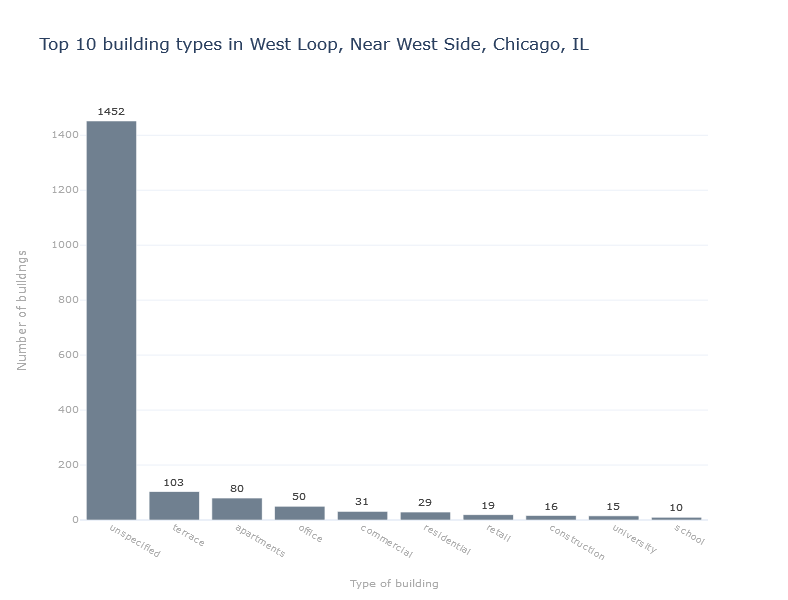

In [28]:
# bar chart
fig = px.bar(osm_building_counts.head(10),
        x='building',
        y='count',
        title="Top 10 building types in "+address, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<div class="alert alert-info">

Now it's your turn! With your area of interest, anywhere in the world, create a bar plot of building types.
    
Take a screengrab or save the resulting image using ```plt.savefig('city-name.png')```, and paste it into this <a href="https://docs.google.com/document/d/1cySh-_fXGkniGJXrztM-ZNtDETmTYunWp4ZbMCOEJ2s/edit?usp=sharing" target="_blank">Google Document</a>.
</div>

# Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

<Axes: >

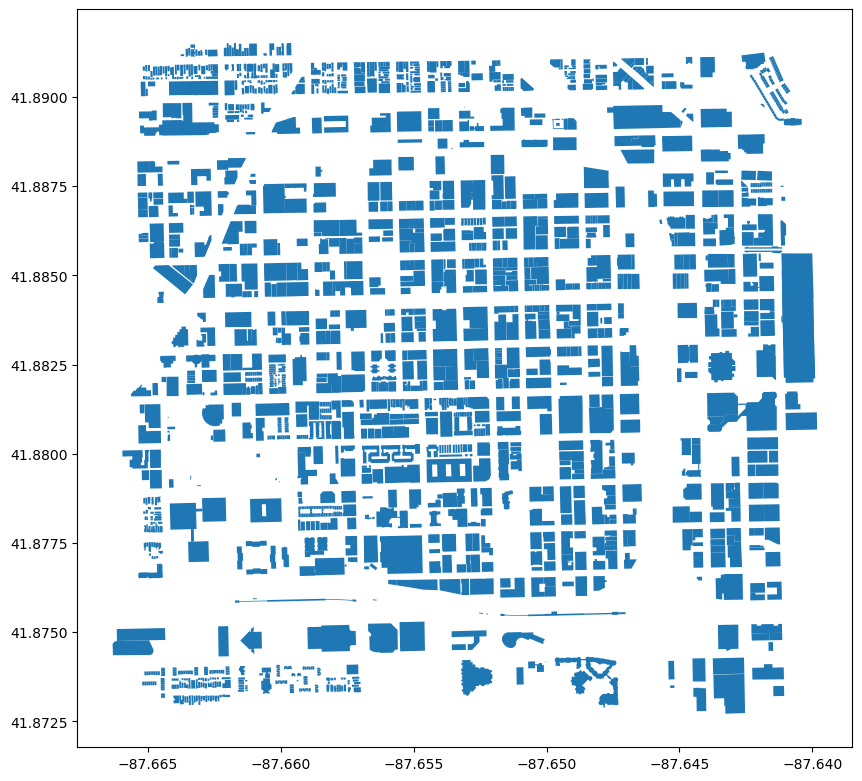

In [29]:
# plot entire dataset
osm.plot(figsize=(10,10))

<Axes: >

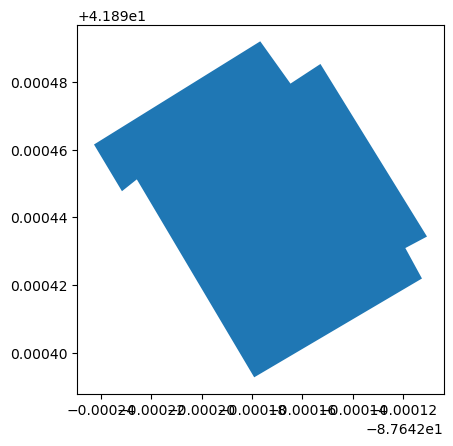

In [30]:
# plot a single random building
osm.sample(1).plot()

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

<Axes: >

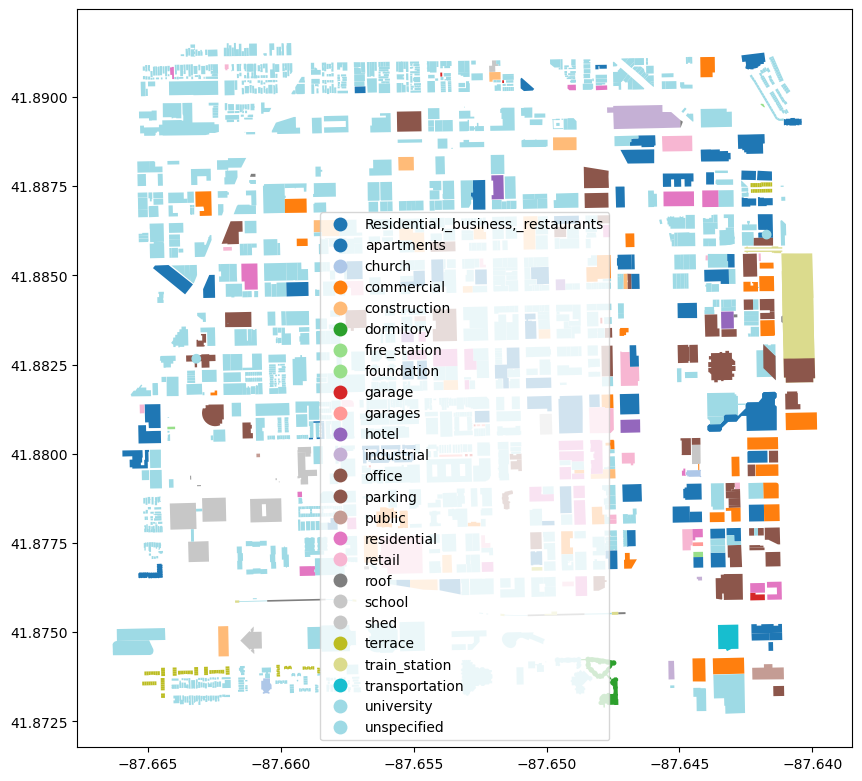

In [31]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)
# in lecture also said we could group these together using loc 

## Clean up: Add a title, move the legend, remove axis

### Move the legend

Moving the legend is surprisingly difficult to do. There are two key/value pairs that you need to pass using the `legend_kwds` argument. The `loc` and `bbox_to_anchor` values allow you to locate the legend outside the plot. Here is a good explanation of how that is done:

* https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132

### Add a title
Use `ax.set_title()` to add a title to the chart.

### Remove the axis

Turn off the axis with the `ax.axis('off')` statement.



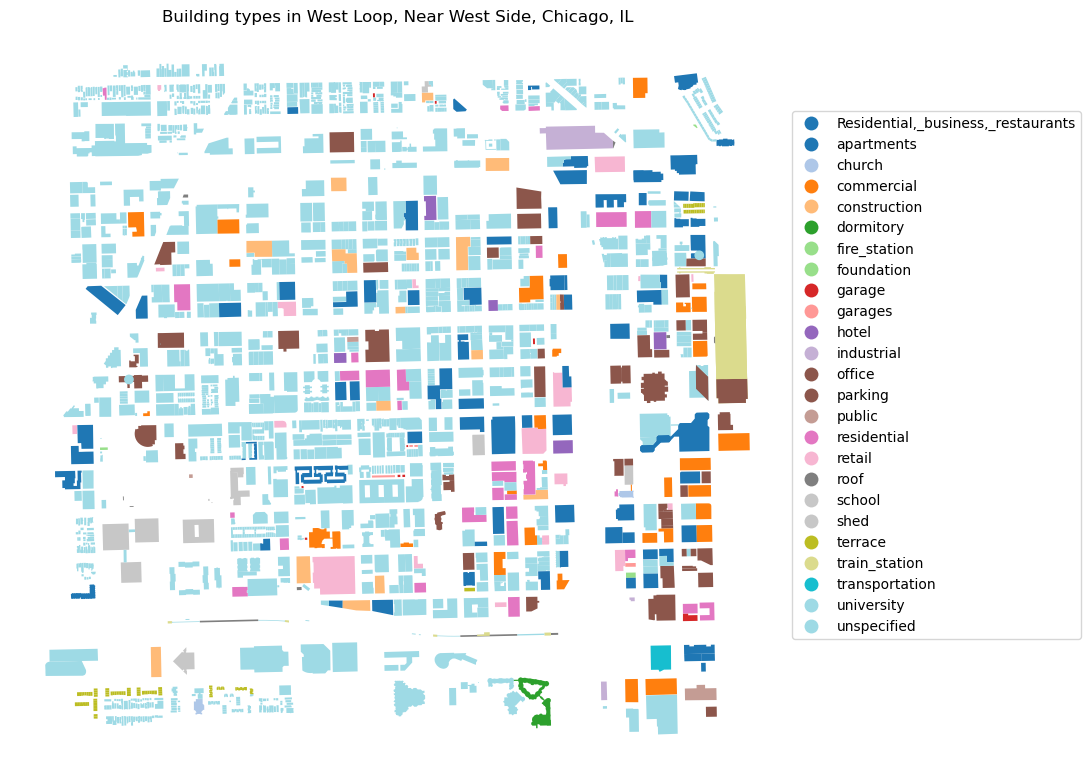

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

### Taking it to the next level

Choropleth maps are created, and left to be... as-is. Ask yourself, will your audience be able to get the most out of your graphic? In fact, choropleth maps are all too often seen as a means to an end, when in fact, they are perhaps the biggest cartographic overuse. Instead, solicit your audience through the use of binary maps, which allow the eyes to more easily detect patterns, convey visual information with greater clarity, and are frankly,  aesthically engaging.

Consider that your graph is a two-dimensional map of an urban space that shows the relationship between what something is and what it is not, built and unbuilt spaces. Using a solid black infill for certain spaces and a light gray color for other spaces mimics a historically popular design approach known as the figure-ground diagram, popularized by urban artists from the 17th century. Consider the specter of Giambattista Nolli's plan of Rome in 1748:

<img src="images/Nolli 1748.jpeg">

In more modern times, figure-ground diagrams have been used to depict urban morphology, the study of the formation of human habitats and their transformation of urban form over time. Modern urbanists such as Geoff Boeing (author of the OSMNX library used in this session) have coined the term "data-driven urban morphology" by combining big data and computation to explore urban spaces through the modeling of spatial data. The sudden and open availability of OSM data for locations all over the world have enabled practitioners to visualize urban phenomena across cities.

<img src="images/urban morphology.jpg" width=600>

Image from "[Spatial information and the legibility of urban form: Big data in urban morphology](ttps://www.sciencedirect.com/science/article/pii/S0268401219302154)," Geoff Boeing, 2021. One square mile of each city’s street network and building footprints, comparing US cities to informal settlements in the Global South.

With just a few weeks under our belts as spatial data scientists, do we dare presume to generate similar graphics of interest? Let's give it a shot.

Goal: To create a series of maps, with each map highlighting a single building type as a figure-ground diagram.

### Step 1: Calculate the map bounds of your data

In order to make sure that each map has the same extent (bounds), assign the min/max x/y's using the `total_bounds` function ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html)).

In [33]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

### Step 2: Create a building type list

Use the `unique()` function to find distinct building types, and put it in a python list.

In [34]:
# get unique buiding types in a list
buildingtypes = osm['building'].unique().tolist()
buildingtypes

['unspecified',
 'train_station',
 'transportation',
 'parking',
 'commercial',
 'apartments',
 'foundation',
 'retail',
 'school',
 'church',
 'office',
 'residential',
 'hotel',
 'terrace',
 'university',
 'fire_station',
 'public',
 'dormitory',
 'garage',
 'industrial',
 'construction',
 'roof',
 'Residential,_business,_restaurants',
 'garages',
 'shed']

### Step 3: Create a loop for each buidling type

Now that we have the list of building types, we can loop through each building type and create individual maps. 

**Beware** Loops are super powerful operations in any programming language. Make sure that what you ask is *reasonable* to the computational resources available.

/tmp/ipykernel_397/2053113613.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



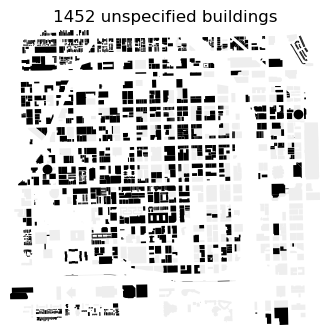

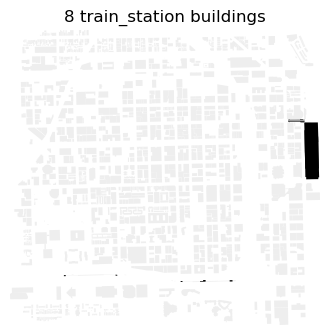

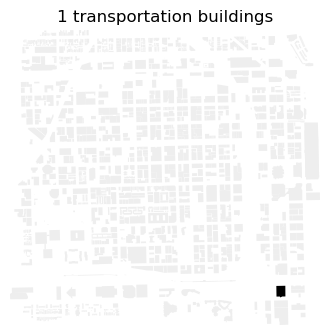

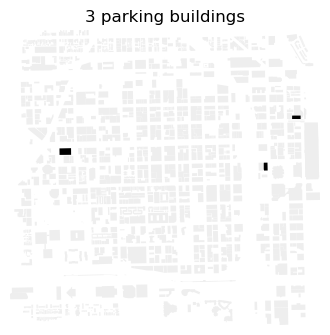

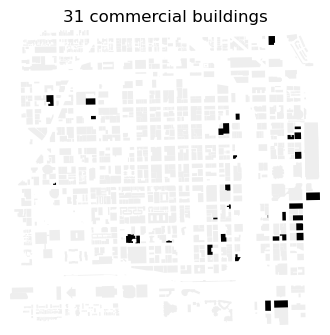

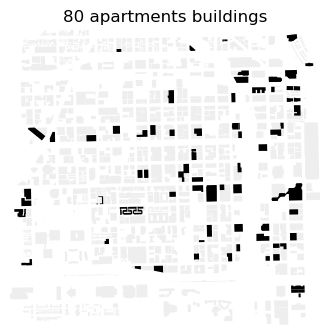

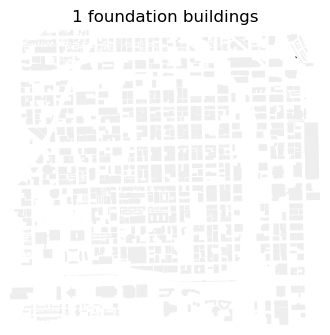

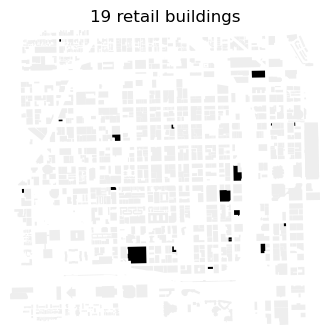

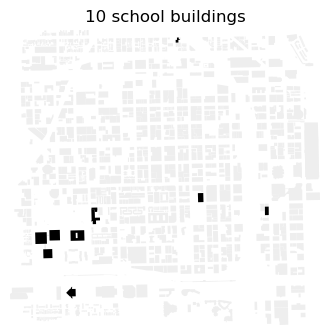

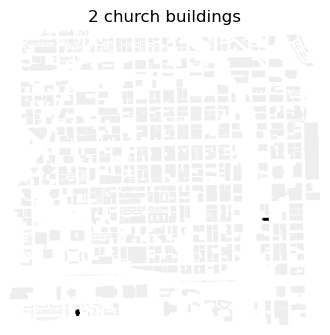

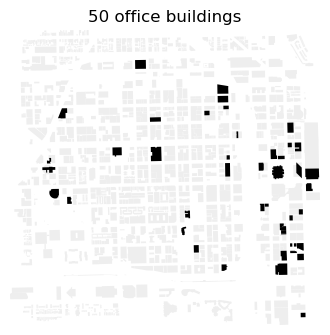

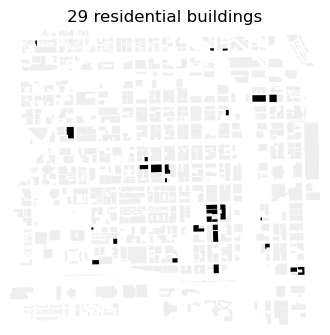

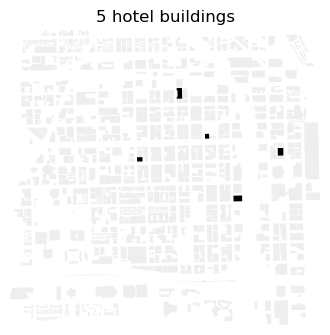

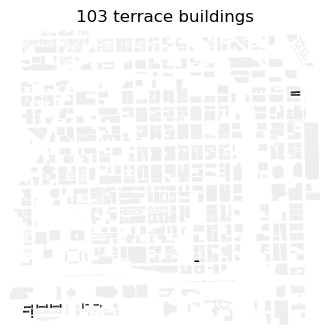

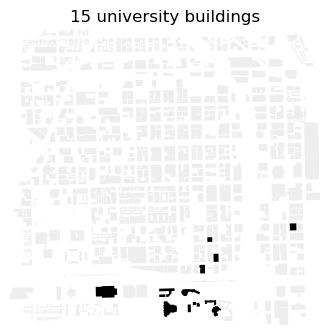

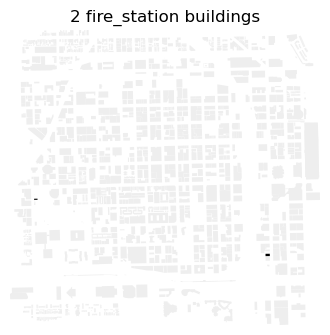

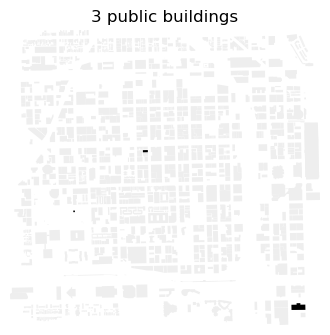

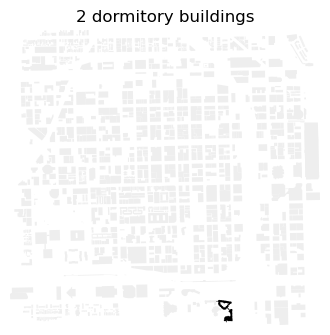

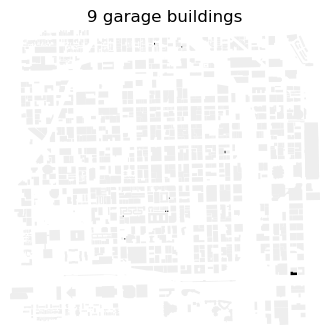

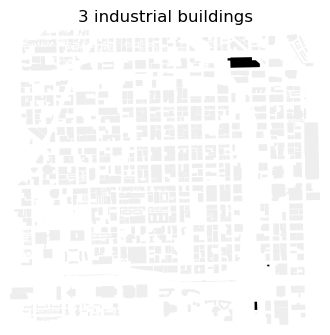

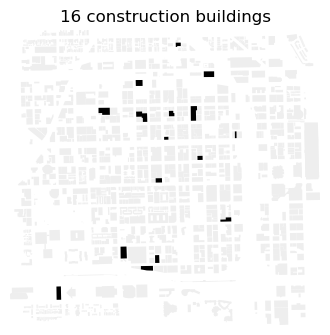

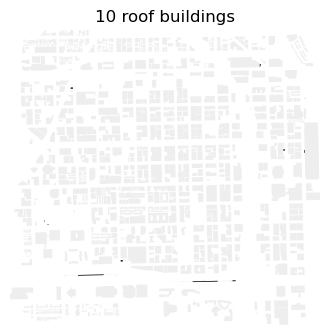

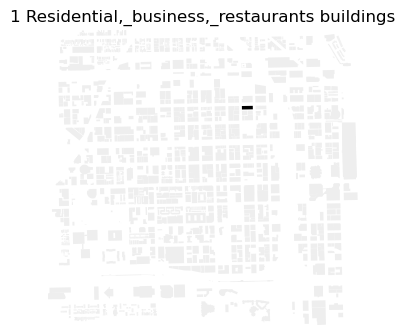

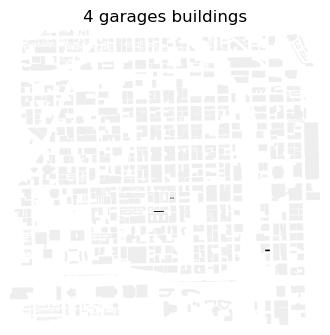

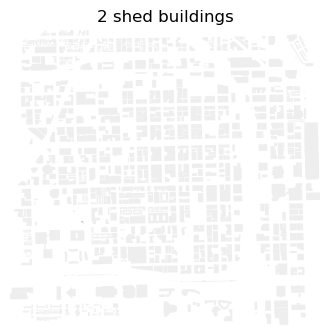

In [35]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    osm.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    osm[osm['building'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(osm[osm['building']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');


## Add a basemap

Adding a basemap to a geopandas plot can be done using the contextily library. To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)
* add a basemap, use the following guidelines: https://github.com/geopandas/contextily

In [36]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

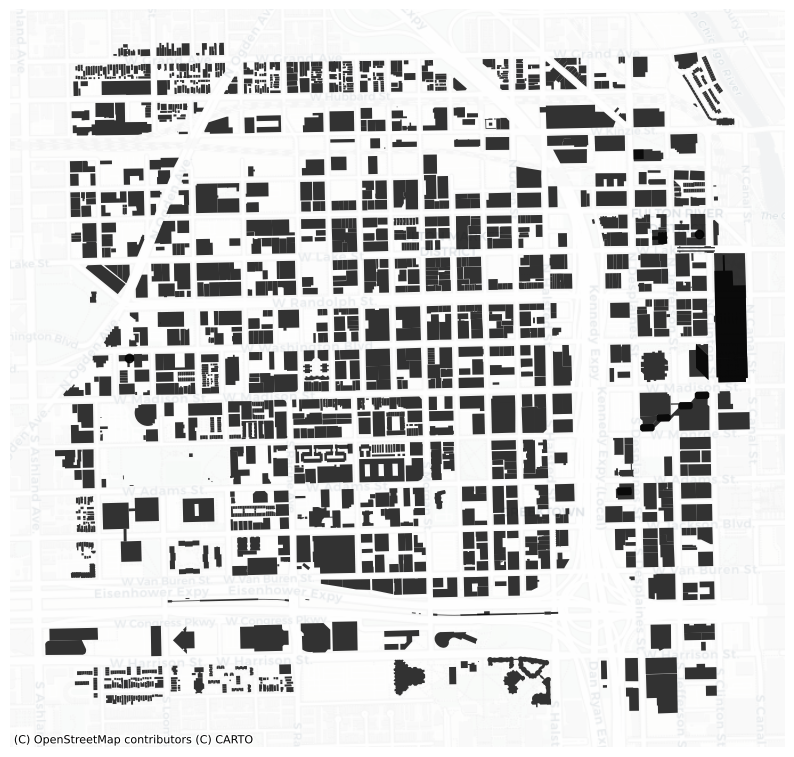

In [37]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.CartoDB.Positron,
                alpha=0.3 # add transparency to make it less dominant
                )

In [38]:
plt.savefig('WestLoopFigureGround.png')

<Figure size 640x480 with 0 Axes>

<div class="alert alert-info">

Create a map plot of building types for your place of interest.
    
Take a screengrab or save the resulting image with ```plt.savefig('city-name.png')```, and paste it into this <a href="https://docs.google.com/document/d/1cySh-_fXGkniGJXrztM-ZNtDETmTYunWp4ZbMCOEJ2s/edit?usp=sharing" target="_blank">Google Document</a>.
</div>

# Create a function

Whew! That was a lot of work to finally get our building map for a given location. But what if you wanted to repeat this process for *multiple* locations?

Welcome to the world of functions. According to [W3Schools](https://www.w3schools.com/python/python_functions.asp), a python function is:
* A function is a block of code which only runs when it is called.
* You can pass data, known as parameters, into a function.
* A function can return data as a result.

In other words, you create a function (a block of code that does something), and it remains dormant until you call on it. For this lab, let's create a function that creates a building map based on location data that you pass into it.

In [ ]:
# let's make this function together
def your_name():    
    print('My name is Ren')

In [ ]:
# call it
your_name()

In [ ]:
# modify the function to accept arguments
def your_name(name):
    print('My name is ' + name)

In [ ]:
# call it
your_name()

In [ ]:
# call it correctly
your_name('Carolyn')

# or (does the same thing)
your_name(name='Carolyn')

In [ ]:
# add additional parameters
def your_name(firstname, lastname):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
your_name('Erik','Felix')

In [ ]:
# provide default values
def your_name(firstname = 'Michael', lastname = 'Jordan'):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
# call it with no arguments
your_name()

In [ ]:
# call it with one argument
your_name(firstname = 'Emma')

In [ ]:
# you can also do computations
def f_to_c(f):
    c = (f-32)*5/9 
    return c

In [ ]:
f_to_c(80)

## Create a function that generates a map based on any location

### The anatomy of the function

<img src="images/function.png">

In [ ]:
# function to create a map using open street map
def make_building_map(location):
 
    # get the data from osm
    osm = ox.features.features_from_address(location,
                                     tags={'building':True},
                                     dist=500)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(6,6))
    
    # add the map
    osm.plot(ax=ax,
                        color="black",
                        alpha=0.8,
                        )

    # add a title
    ax.set_title(location)

    # get rid of the axis
    ax.axis('off')    

In [ ]:
%%time 
# a "magic" function to display the time it took to run this cell
# run the function once
make_building_map('rome')

# Looping through it

To make the use of functions even more effective, let's create a list of addresses.

In [ ]:
address_list = ['downtown los angeles','new york','kyoto','monrovia','paris','new delhi']

In [ ]:
%%time
# run our function for every address in our list
for address in address_list:
    make_building_map(address)

# Doing other searches

For this lab, we used the tags argument: `'building':True`. This indicates a desire to download *all* buildings for the given geography. There are many other options to filter what you download from OSM. 

* https://wiki.openstreetmap.org/wiki/Map_Features

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_address(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_address(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_address(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_address(place, tags={'leisure': ['park']})
```

Note that when you perform a different search based on a different type of tag, **you may not get the same columns back**. You will need to adjust the code in this lab to reflect the columns that are returned. For example, a tag for "leisure" may not return "buildings", and instead, you may want to color code the map by the column "leisure."